# IA Heart Disease Dataset from UCI


In [1]:
!pip install pydotplus
!pip install graphviz
!pip install matplotlib
!pip install scipy
!pip install sklearn
!pip install pandas
!pip install numpy

link de dataset https://www.kaggle.com/ronitf/heart-disease-uci
importando librerias de interes

In [26]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import argparse
import glob
from pandas import DataFrame
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

importando los datos

In [3]:
dataset=pd.read_csv("heart.csv")

Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Attribute Information:

Only 14 attributes used: 1. #3 (age) 2. #4 (sex) 3. #9 (cp) 4. #10 (trestbps) 5. #12 (chol) 6. #16 (fbs) 7. #19 (restecg) 8. #32 (thalach) 9. #38 (exang) 10. #40 (oldpeak) 11. #41 (slope) 12. #44 (ca) 13. #51 (thal) 14. #58 (num) (the predicted attribute)

Complete attribute documentation:

1.  age: age in years 
2.  sex: sex (1 = male; 0 = female) 
3.  cp: chest pain type <br>
    -- Value 1: typical angina<br>
    -- Value 2: atypical angina<br>
    -- Value 3: non-anginal pain<br>
    -- Value 4: asymptomatic<br>
4.  trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5.  chol: serum cholestoral in mg/dl Y
6.  fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7.  restecg: resting electrocardiographic results<br>
    -- Value 0: normal<br>
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8.  thalach: maximum heart rate achieved
9.  exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment<br> -- Value 1: upsloping<br> -- Value 2: flat<br> -- Value 3: downsloping 
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing (in any major vessel: attributes

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Graficaremos las variables numericas y categorias

# Variables categorias y numericas

dadas las descripciones tomadas del link original podemos decir que los siguientes atributos son de tipo categorico
- sex
- cp
- fbs
- restecg 
- exang
- slope
- thal
<br>y los siguientes son de tipo numerico
- age
- trestbps
- chol
- thalach 	
- oldpeak
- ca

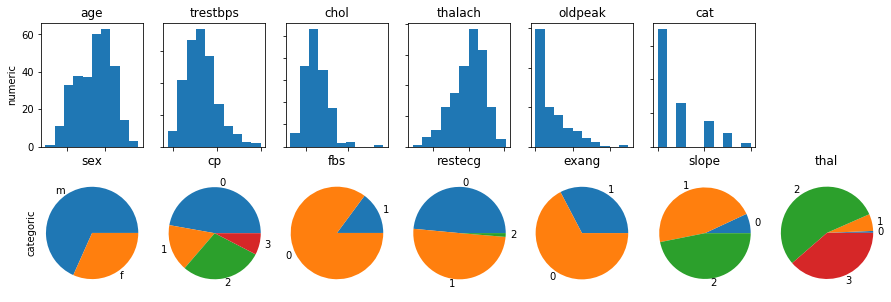

In [5]:
fig, axs = plt.subplots(2, 7, figsize = (15,5))

#numeric

#age
axs[0, 0].hist(dataset.age)
axs[0, 0].set_title('age')
#trestbps
axs[0, 1].hist(dataset.trestbps)
axs[0, 1].set_title('trestbps')
#chol
axs[0, 2].hist(dataset.chol)
axs[0, 2].set_title('chol')
#thalach
axs[0, 3].hist(dataset.thalach)
axs[0, 3].set_title('thalach')
#oldpeak
axs[0, 4].hist(dataset.oldpeak)
axs[0, 4].set_title('oldpeak')
#cat
axs[0, 5].hist(dataset.ca)
axs[0, 5].set_title('cat')

#categoric

#sex
datasex = [dataset.sex.sum(), dataset.sex.shape[0] - dataset.sex.sum()]

axs[1, 0].pie(datasex, labels = ['m','f'])
axs[1, 0].axis('equal')
axs[1, 0].set_title('sex')

#cp
datacp = []
datacp.append((dataset['cp'] == 0).sum())
datacp.append((dataset['cp'] == 1).sum())
datacp.append((dataset['cp'] == 2).sum())
datacp.append((dataset['cp'] == 3).sum())

axs[1, 1].pie(datacp, labels =['0','1','2','3'])
axs[1, 1].axis('equal')
axs[1, 1].set_title('cp')

#fbs
datafbs = [dataset.fbs.sum(), dataset.fbs.shape[0] - dataset.fbs.sum()]

axs[1, 2].pie(datafbs, labels = ['1', '0'])
axs[1, 2].axis('equal')
axs[1, 2].set_title('fbs')

#restecg
datarestecg = []
datarestecg.append((dataset['restecg'] == 0).sum())
datarestecg.append((dataset['restecg'] == 1).sum())
datarestecg.append((dataset['restecg'] == 2).sum())

axs[1, 3].pie(datarestecg, labels = ['0', '1', '2'])
axs[1, 3].axis('equal')
axs[1, 3].set_title('restecg')

#exang
dataexang = [dataset.exang.sum(), dataset.exang.shape[0] - dataset.exang.sum()]

axs[1, 4].pie(dataexang, labels = ['1','0'])
axs[1, 4].axis('equal')
axs[1, 4].set_title('exang')

#slope
dataslope = []
dataslope.append((dataset['slope'] == 0).sum())
dataslope.append((dataset['slope'] == 1).sum())
dataslope.append((dataset['slope'] == 2).sum())

axs[1, 5].pie(dataslope, labels=['0','1','2'])
axs[1, 5].axis('equal')
axs[1, 5].set_title('slope')

#thal 
datathal = []
datathal.append((dataset['thal'] == 0).sum())
datathal.append((dataset['thal'] == 1).sum())
datathal.append((dataset['thal'] == 2).sum())
datathal.append((dataset['thal'] == 3).sum())

axs[1, 6].pie(datathal, labels = ['0','1','2','3'])
axs[1, 6].axis('equal')
axs[1, 6].set_title('thal')


y = ['numeric','categoric']
i = 0
for ax in axs.flat:
    if (i < 6):
        ax.set(xlabel = '', ylabel=y[0])
    else:
        ax.set(xlabel = '', ylabel=y[1])
    i += 1

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.delaxes(axs.flatten()[6])

##  Elementos faltantes
Unicamente en la columna thal hay dos datos que no corresponden a los datos posibles de dicho atributo

## Partimos los datos en entrenamiento y test
80% para entrenamiento y 20% para test

In [54]:
features = dataset[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]].values
#features = dataset[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca"]].values
target = dataset["target"].values

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)


(242, 13) (242,)
(61, 13) (61,)


## Arbol de decision

entrenamos el arbol de decision

training set:  99.58677685950413 %
test set:  83.60655737704919 %


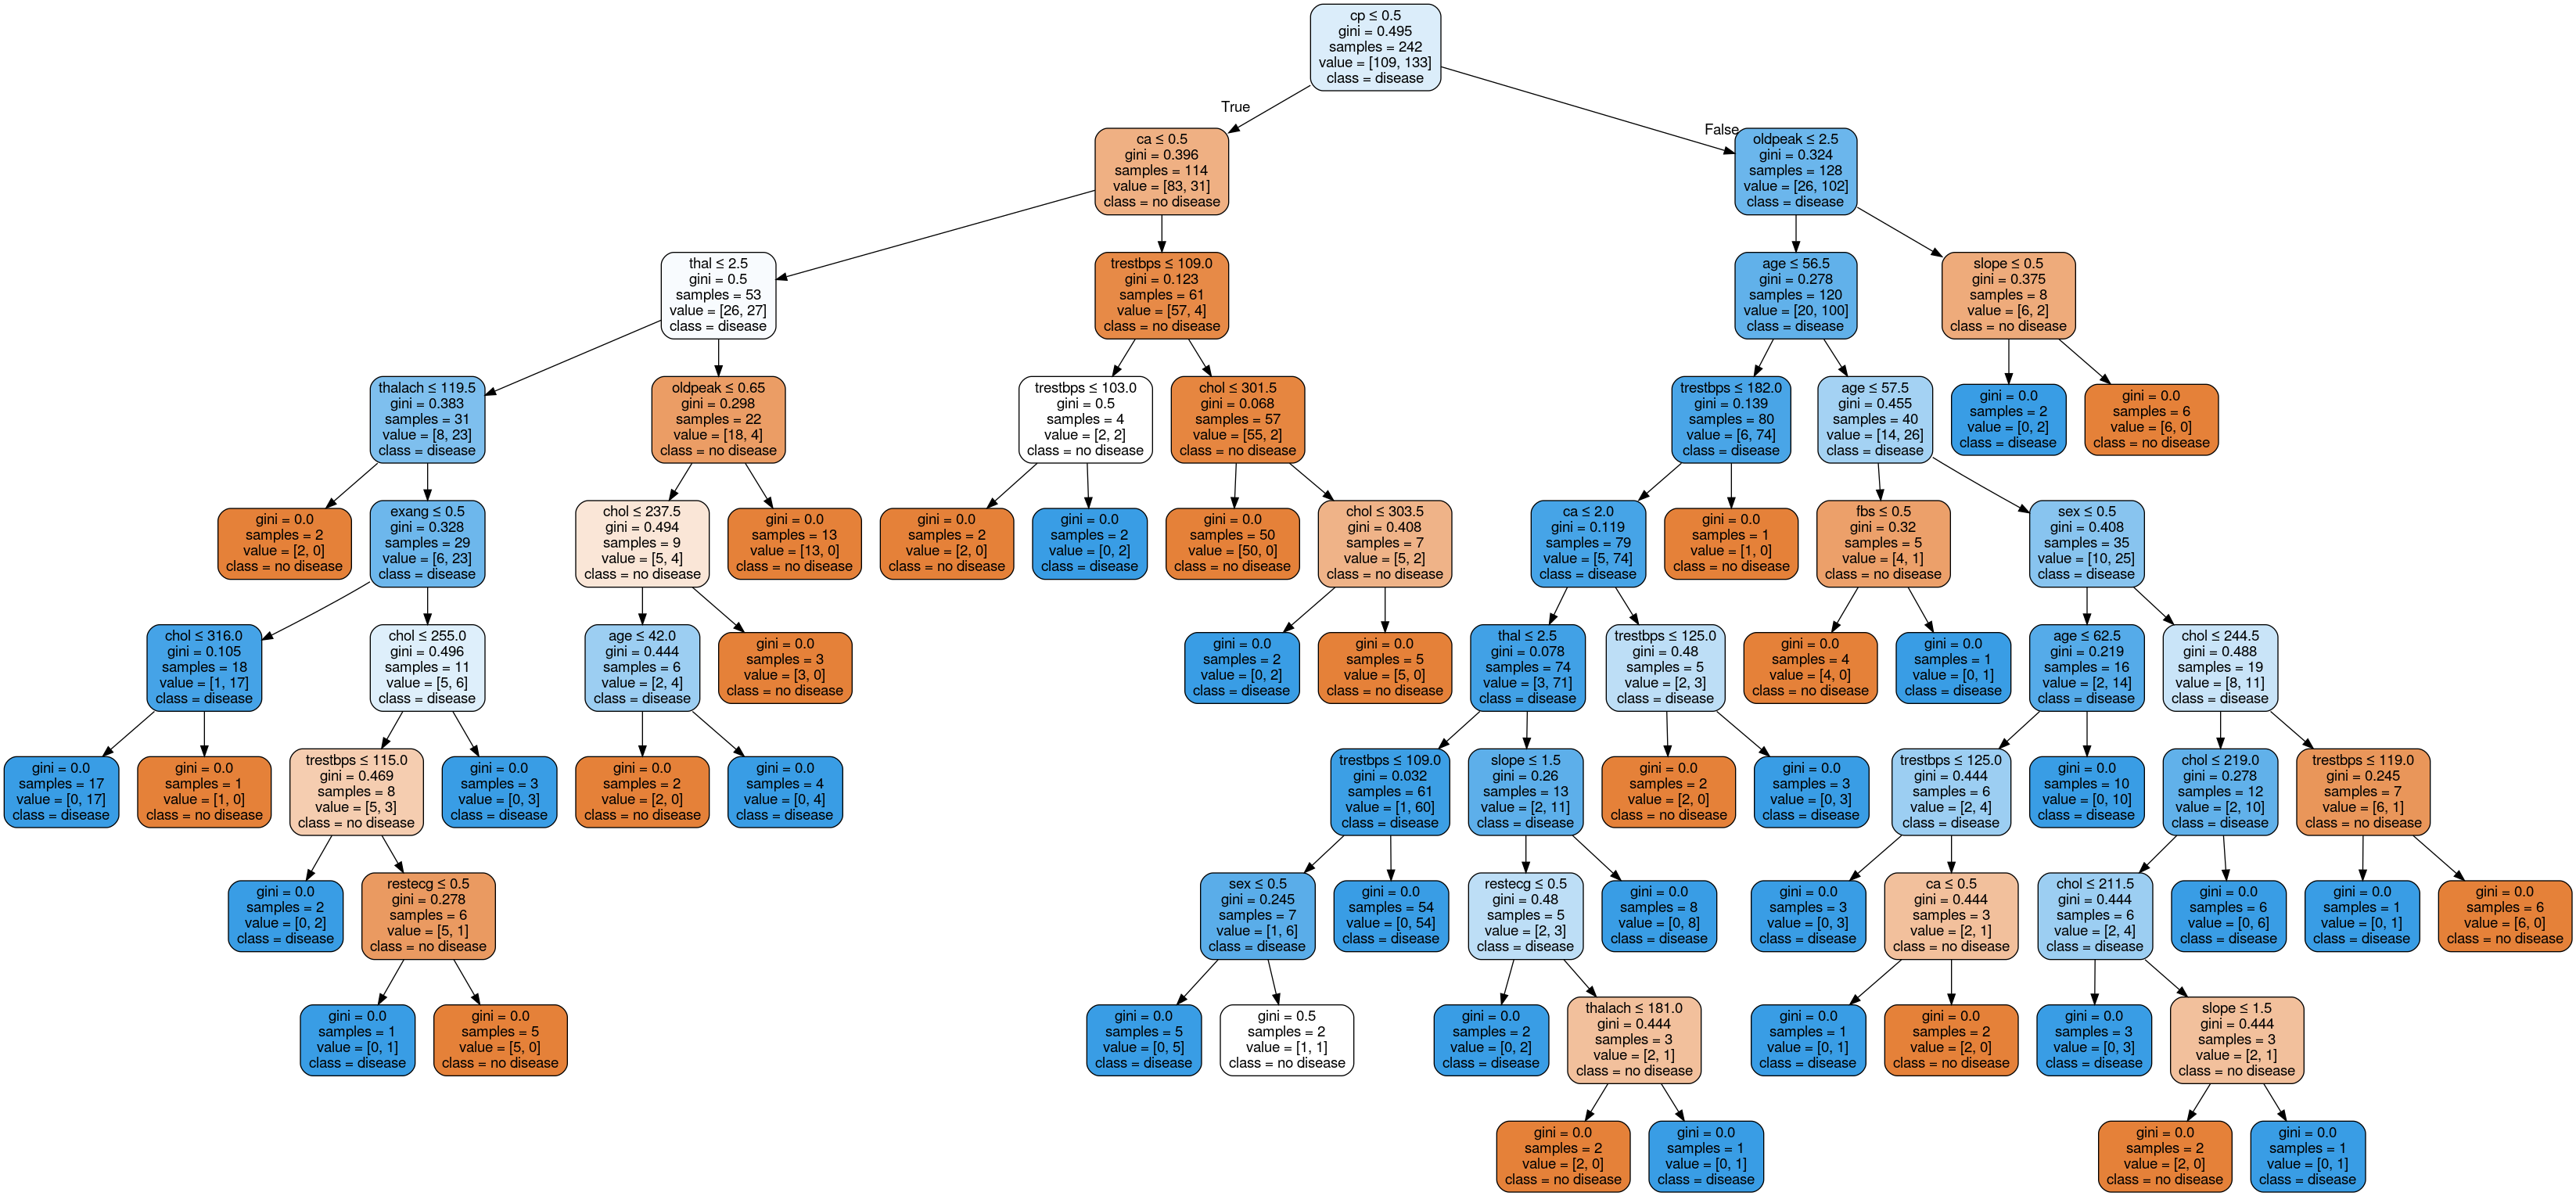

In [65]:
#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
model1 = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 3, random_state = 1)
model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("training set: ", model1.score(trainX, trainY)*100, "%")
#Print the score on the test data
print("test set: ", model1.score(testX, testY)*100, "%")

#The accuracy on each dataset can be calculated as follow
#predY = model1.predict(testX)
#print("Accuracy: ", metrics.accuracy_score(testY, predY)*100, "%")


#tree.plot_tree(model1)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


dot_data = StringIO()
export_graphviz(model1, 
                out_file=dot_data,
                filled=True, 
                rounded=True,
                feature_names = list(dataset.columns[:13]),
                class_names = ['no disease','disease'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Matrices de confusión

In [23]:
confusion_matrix(model1.predict(testX), testY)

array([[31,  5],
       [ 6, 19]])

## Interpretación del modelo obtenido

## Modelo de Naive Bayes

Entrenamos modelo de bayes ingenuo


In [18]:
gnb = GaussianNB()

model2 = gnb.fit(trainX, trainY)

#Print the score on the train data
print("training set: ", model2.score(trainX, trainY) * 100, "%")
#Print the score on the test data
print("test set: ", model2.score(testX, testY)*100, "%")

GaussianNB(priors=None, var_smoothing=1e-09)
training set:  86.77685950413223 %
test set:  77.04918032786885 %


## Red Neuronal

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (12,10,8,6,4,2), random_state=1, verbose = True)

modell = model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training: ")
print(modell.score(trainXX, trainY)*100, "%")
print(confusion_matrix(modell.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test: ")
print(modell.score(testXX, testY)*100, "%")
print(confusion_matrix(modell.predict(testXX), testY))

On training: 
82.23140495867769 %
[[ 84  13]
 [ 30 115]]

On test: 
78.68852459016394 %
[[14  3]
 [10 34]]


In [31]:
dot_data = StringIO()
export_graphviz(modell, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.